<a href="https://colab.research.google.com/github/Rubikumariyadav/Email-Campaign-Effectiveness/blob/main/Email_campaign_effetiveness(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name-Email Campaign Effectiveness Prediction

# Project Type-Supervised ML Classification

# Contribution-Individual
# ** Name-RUBI KUMARI**

# Project Summary-The goal of this project is to create a machine learning model that can characaterize and track emails sent through market campaigns.One of the main challenges in email marketing is determine which emails are beign read,ignored or acknowledged by the reader.
# We will split our data into a training set and a testing set.We will use the training set to fit the model and the testing set to evaluate its performance.
# We will use a varities of martrics, such as precision, recallc ,F1 scores, to assess the model acuuracy.
# once the model is trained and evaluted it can be deployed in aproduction enviroment to help small to medium business owners of their marketing campaign.By usin the model they will ve able to characterisied and track emails they will be able to make more information decision about how to target their marketing efforts ad increasing customer.
# Overall this project aims to provide small to medium busines owners with a powerful tool for improving the effeactiveness of their campaign.By using machinne learning to characterisied and track emails, they chance of success for their marketing.

#GITHUB LINK-

# Importing essential libraries

In [ ]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load csv file
path="/content/drive/MyDrive/data_email_campaign.csv"

In [ ]:
#load file
email_df=pd.read_csv(path)


In [ ]:

email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


In [ ]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation: {email_df.shape[0]} and feature: {email_df.shape[1]}')

Total observation: 68353 and feature: 12


In [ ]:
# Dataset Info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {email_df.duplicated().value_counts()}, unique values with {len(email_df[email_df.duplicated()])} duplication")

Data is duplicated ? False    68353
Name: count, dtype: int64, unique values with 0 duplication


In [ ]:
# Missing Values/Null Values Count
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

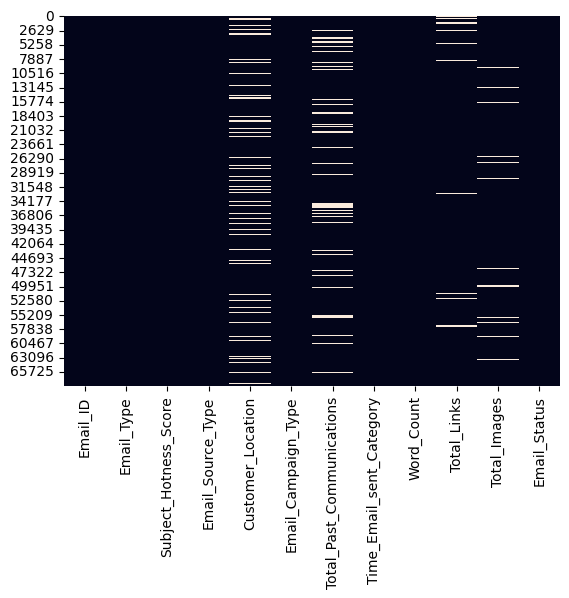

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_df.isnull(), cbar=False);

# Variables describtion-
*Email_id=email id of customers
*Email_type-There are two types of categories 1 & 2 i.e marketing emails or important updates and notices like email business regardings.
*Email_Campaign_type=The campaign type of the email.
*Word_count= Total count of word in each email.
*Total_links=total number of limks in the email.
*Total_Images=total number of images in the email.
*Total _past_communication= Total number of customer who      *previously email from the same source of sending email in the noon ,morning and evening.
Location_customer= The location where customers resides.

# 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# Chart 1

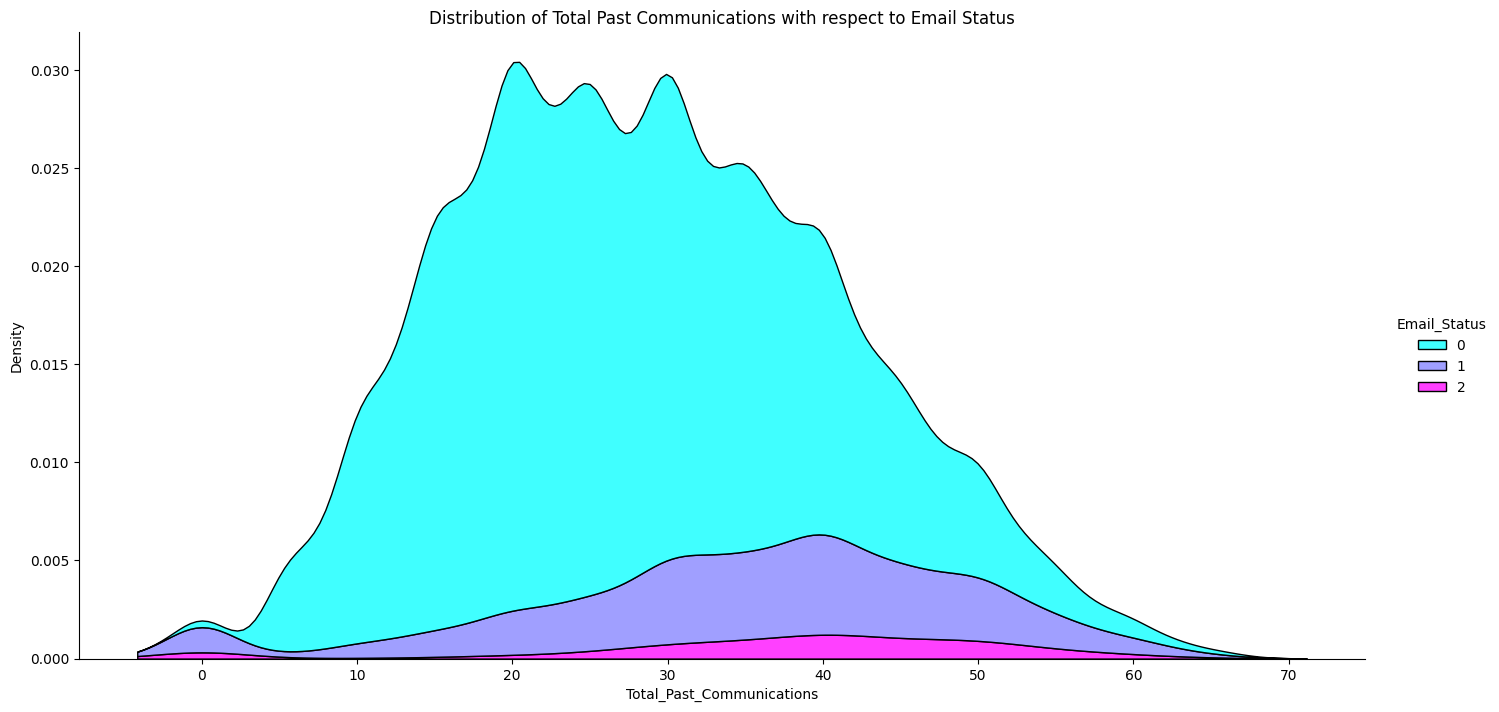

In [ ]:
# Distribution of total past communication
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data=email_df,
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='cool');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

# Chart 2

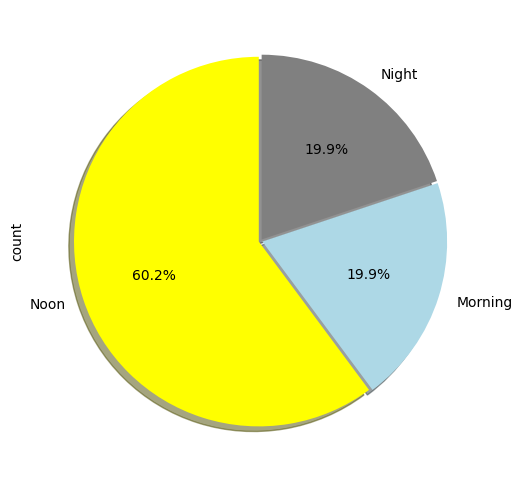

In [ ]:
#pie chart for distribution of email based on time period
email_df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['yellow','lightblue','grey'],
                               explode=[0.01,0.01,0.01]
                              );

#Check unqiue vlaues of each variables in this dataset.

In [ ]:
# Check Unique Values for each variable.
for i in email_df.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, email_df[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


# CHART3

<Axes: xlabel='Total_Images', ylabel='Total_Links'>

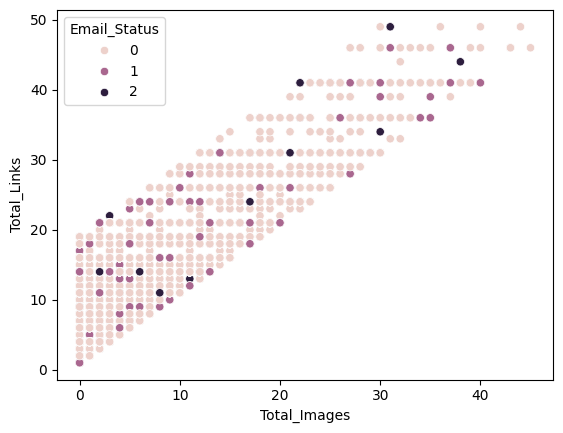

In [ ]:
sns.scatterplot(x=email_df["Total_Images"],y=email_df["Total_Links"],hue=email_df['Email_Status'])

# CHART 4 with imbalanced dataset

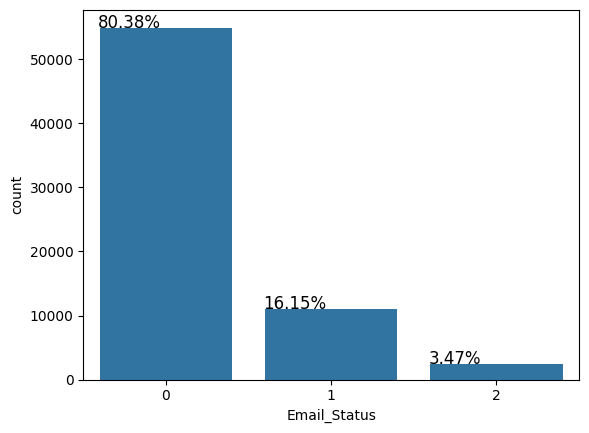

In [ ]:
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

# HYPOTHESIS TESTING

In [ ]:
# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(email_df['Email_Type'],email_df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


In [ ]:
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                                 email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")



Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


# DATA Analysis

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = email_df.copy()
# Checking Shape of Email Read
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [ ]:
# Email Status groupby Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [ ]:
# Email Status groupby Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [ ]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [ ]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [ ]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#creating variable to store categorial features
cat_feature = [feature for feature in df.columns.to_list() if feature not in num_feature]
cat_feature

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [ ]:

df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [ ]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [ ]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)



Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

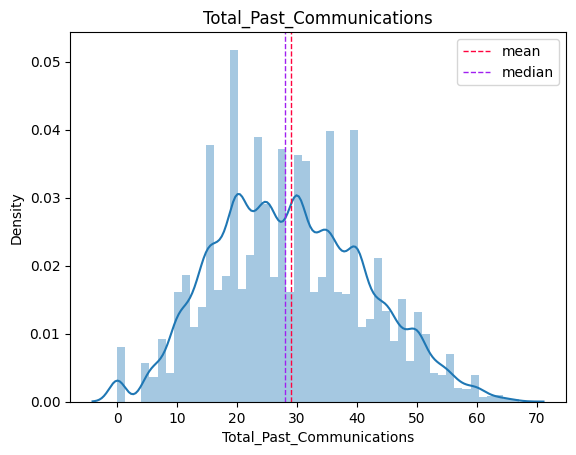

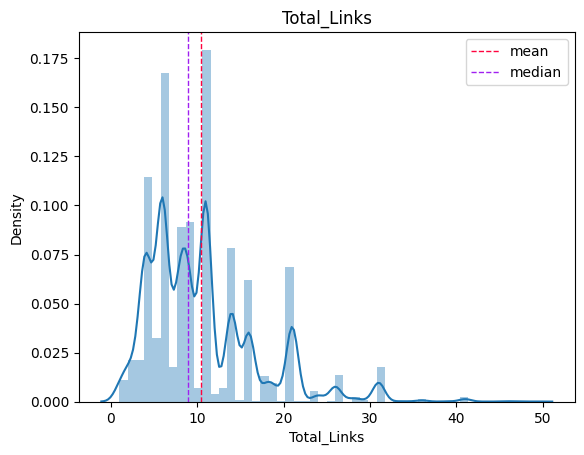

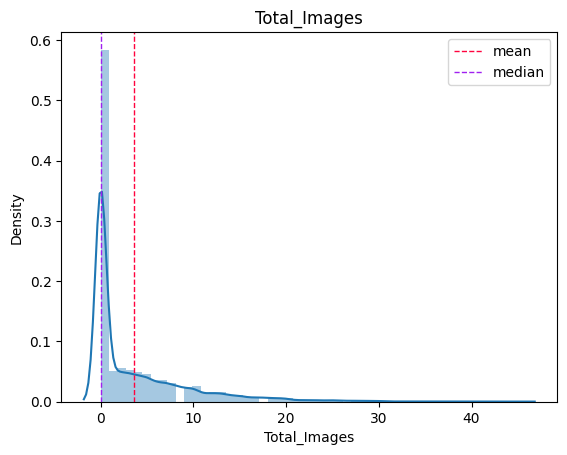

In [ ]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

In [ ]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

# DATA WRANGLING

In [ ]:
df=email_df.copy()

In [ ]:
pd.DataFrame(df.groupby('Email_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...


In [ ]:
pd.DataFrame(df.groupby('Email_Source_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...


In [ ]:
pd.DataFrame(df.groupby('Email_Campaign_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...
2,3,Email_ID Email_Type Subject_...


In [ ]:
pd.DataFrame(df.groupby('Time_Email_sent_Category'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...
2,3,Email_ID Email_Type Subject_...


In [ ]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df =email_df.drop(columns_to_drop,axis=1)

<Axes: >

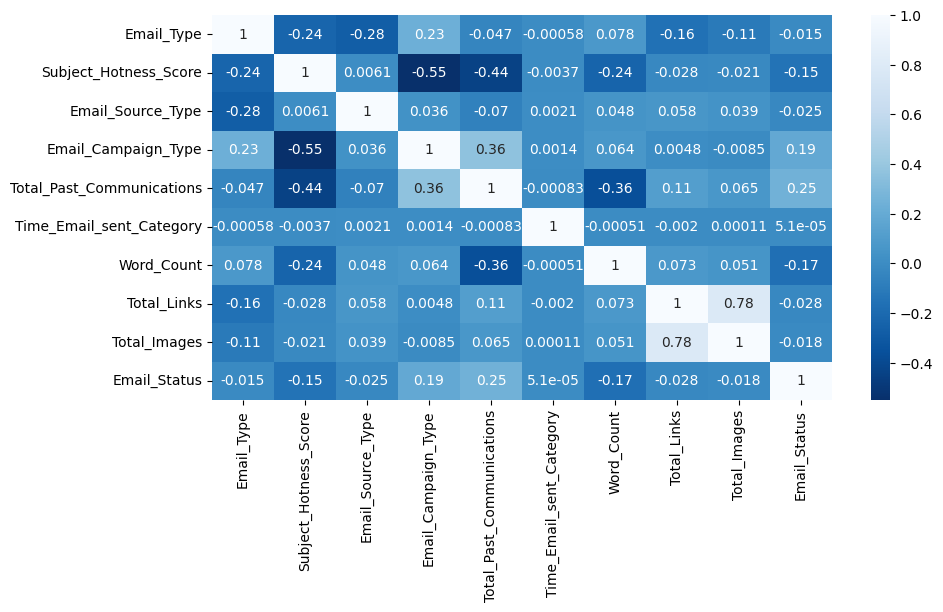

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

# Correlation matrix justifies our earlier hypotheses. Email

Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. We can see multi collinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

# Multicollinearity and Feature Selection:

# Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

# We can quantify multicollinearity using Variance Inflation Factors (VIF).

# VIF = 1/(1-R^2) The more the value of R^2 is closer to 1 the more, VIF score tends to infinity. VIF starts with 1 and denotes that the variable has no correlation at all. VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

# Handling outliers

In [ ]:
# Handling Outliers & Outlier treatments in numerical feature
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


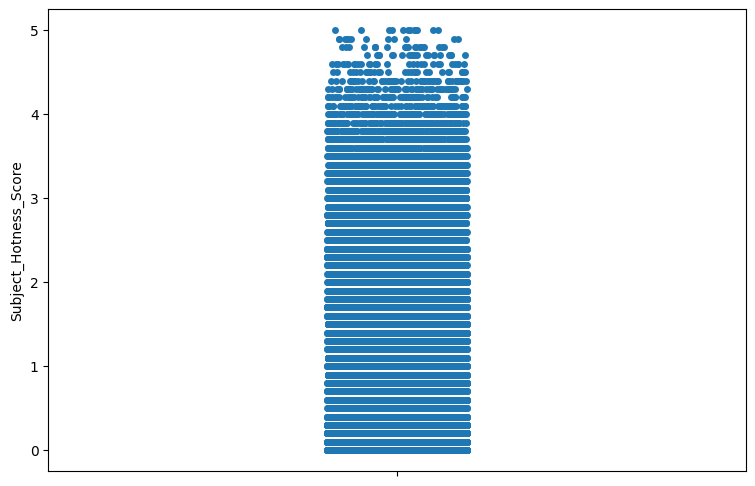

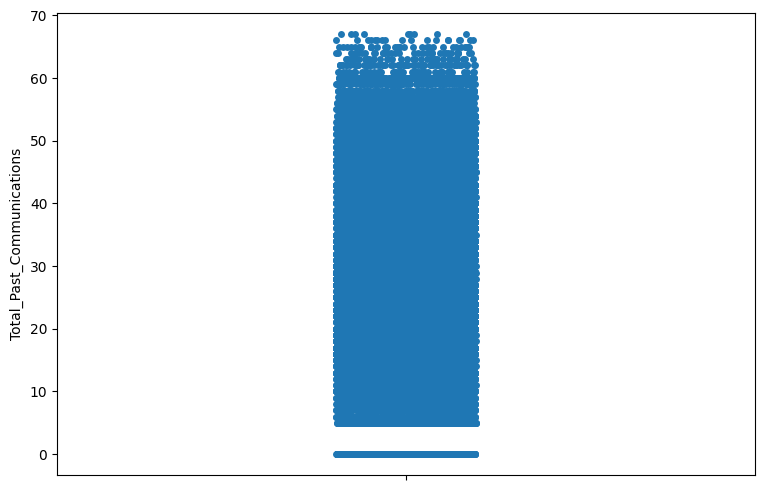

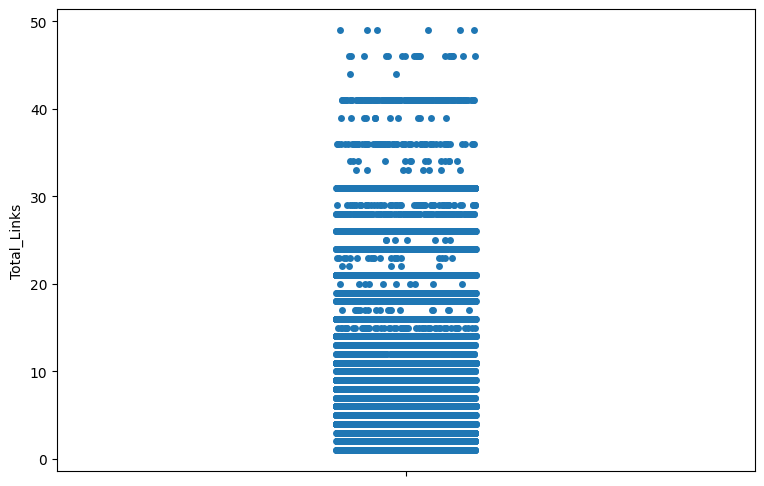

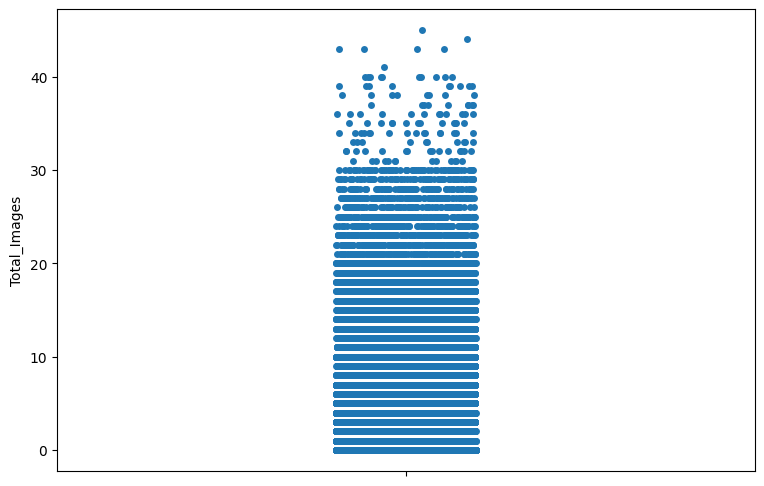

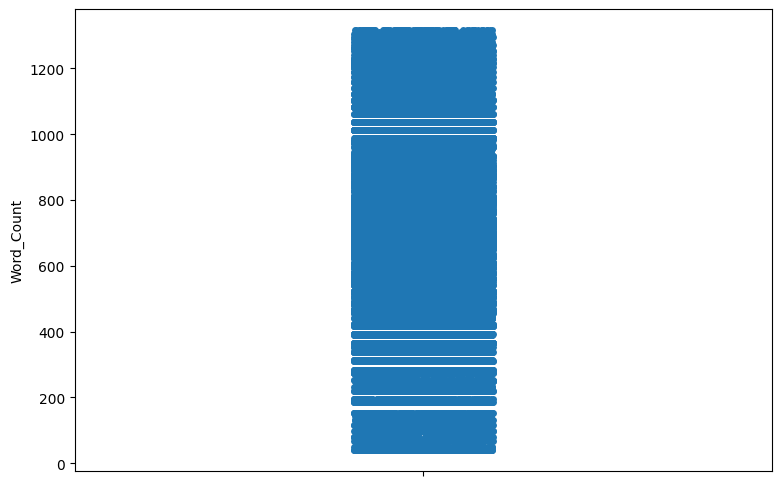

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in num_feature:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])
  plt.show()
  print('='*120)

# FEATURES

In [ ]:
#creating separate copy for categorial feature
cat_feature_encoding = cat_feature.copy()

In [ ]:
# removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [ ]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

In [ ]:
# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

In [ ]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')

Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df,columns= ['Time_Email_sent_Category','Customer_Location',
                                   'Email_Campaign_Type'], drop_first = True)

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(columns = ['Email_ID'], inplace = True)

In [ ]:
#combining total image and total link to find its percentage in total word count
# Percentage of words that are links+image
df['Percentage_of_words_that_are_links_image'] = ((df['Total_Links']+ df['Total_Images'])/ df['Word_Count'])*100

In [ ]:
# Number of Images per link
df['Images_plus_link'] = df['Total_Images'] / df['Total_Links']

In [ ]:
#dropping total link and image
df.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [ ]:
#replacing infinity values with 0
np.isinf(df).values.sum()
df.replace([np.inf, -np.inf], 0, inplace=True)

# Feature selection

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
          #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Calling the function
df_removed_var=dropping_constant(df)

Columns dropped: []


# Data Scaling

In [ ]:
# Scaling your data
# Checking the data
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Total_Past_Communications,Word_Count,Email_Status,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_2,Email_Campaign_Type_3,Percentage_of_words_that_are_links_image,Images_plus_link
0,1,2.20,2,33.00,440,0,False,False,False,False,False,True,False,False,True,False,1.82,0.00
1,2,2.10,1,15.00,504,0,True,False,False,False,False,False,False,False,True,False,0.99,0.00
2,2,0.10,1,36.00,962,1,True,False,True,False,False,False,False,False,False,True,0.52,0.00
3,1,3.00,2,25.00,610,0,True,False,False,False,False,True,False,False,True,False,2.62,0.00
4,1,0.00,2,18.00,947,0,True,False,False,True,False,False,False,False,False,True,0.42,0.00


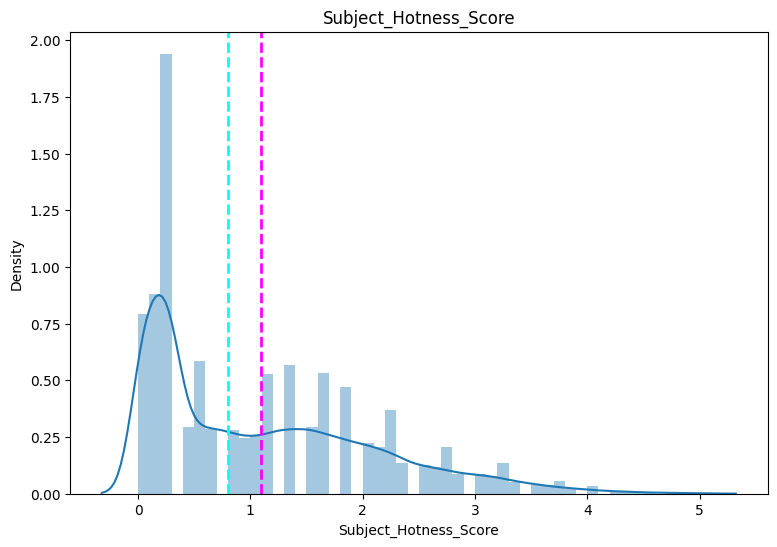

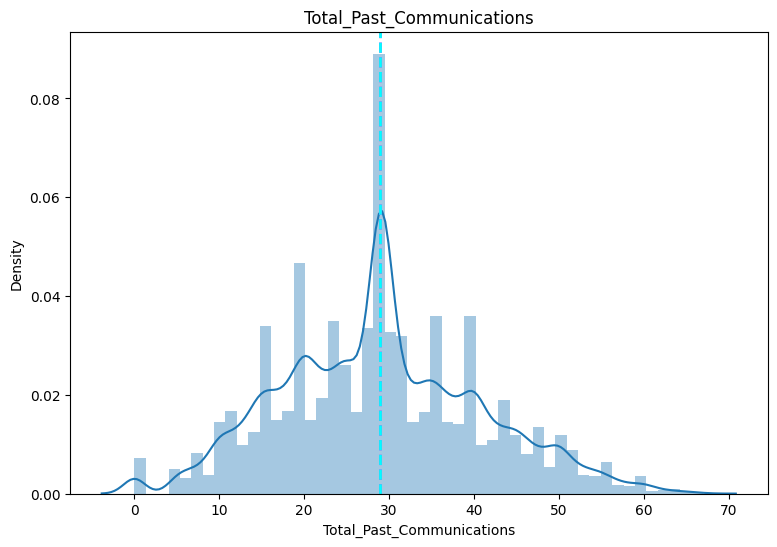

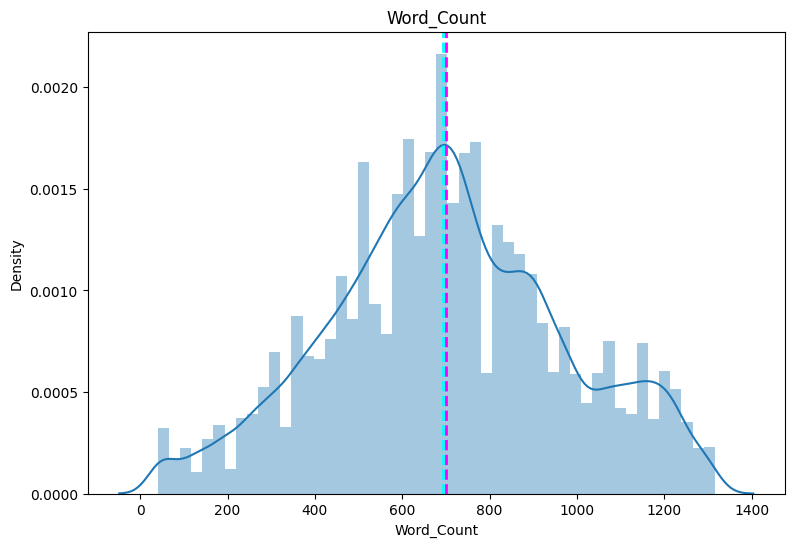

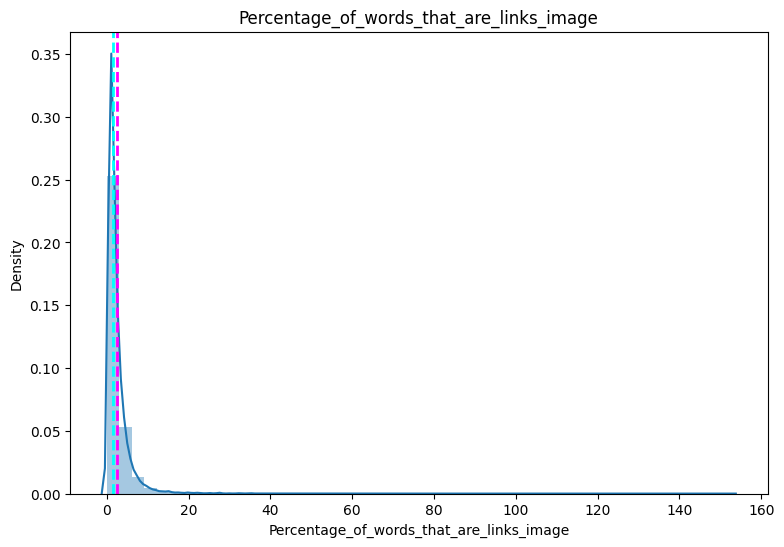

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

# SPLITING DATA

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Email_Status",axis=1),df["Email_Status"],
    test_size = 0.2, random_state = 0)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Email_Status",axis=1),df["Email_Status"],
    test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 17)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 17)
Number transactions y_test dataset:  (13671,)


# Handling imbalanced data

In [ ]:
df['Email_Status'].value_counts()

Email_Status
0    54941
1    11039
2     2373
Name: count, dtype: int64

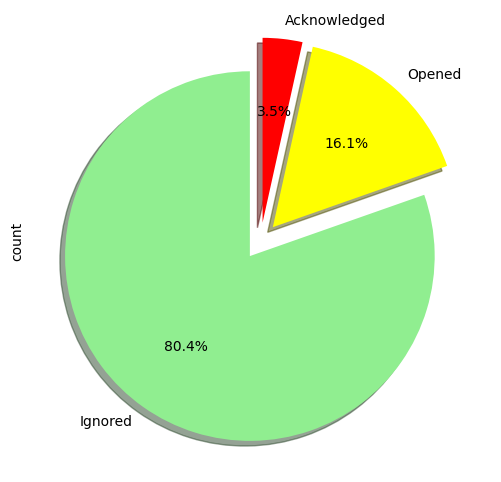

In [ ]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Ignored','Opened','Acknowledged'],
                               colors=['lightgreen','yellow','red'],
                               explode=[0.1,0.1,0.1]
                              );

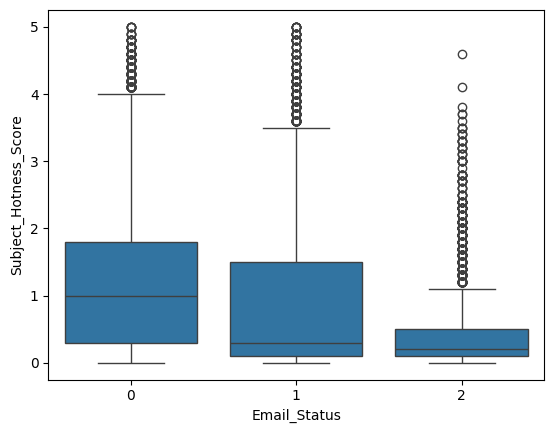

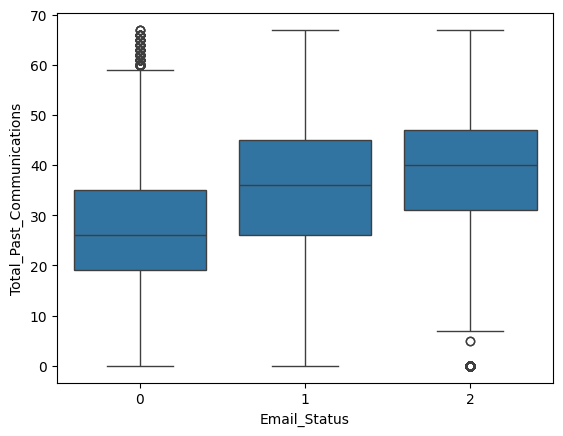

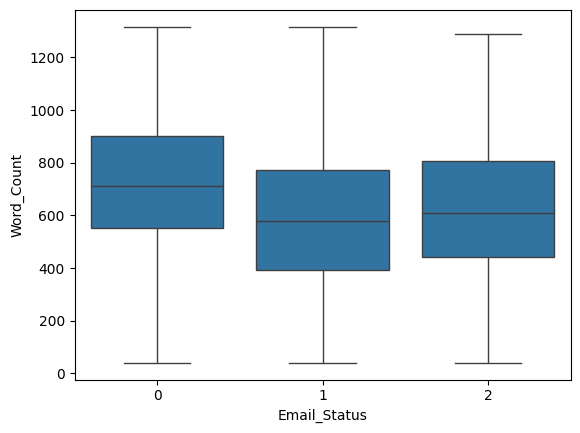

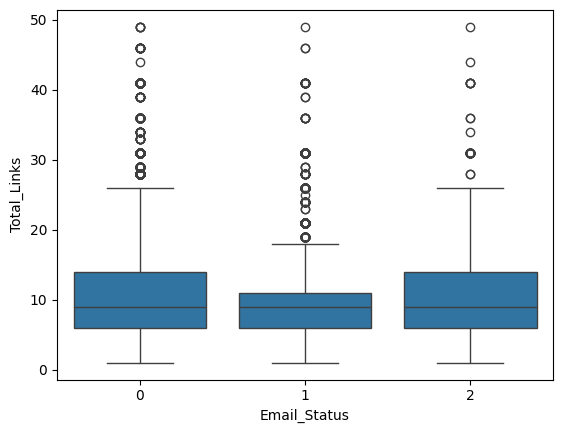

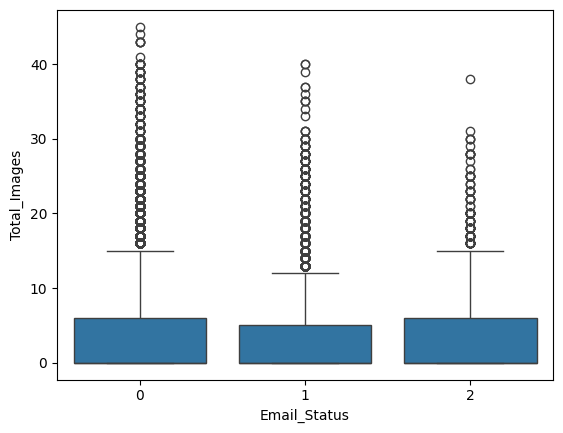

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=email_df['Email_Status'], y=email_df[value])
 plt.show()

# SMOTE

In [ ]:
#SMOTE
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 17)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 17)
Number transactions y_test dataset:  (13671,)


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


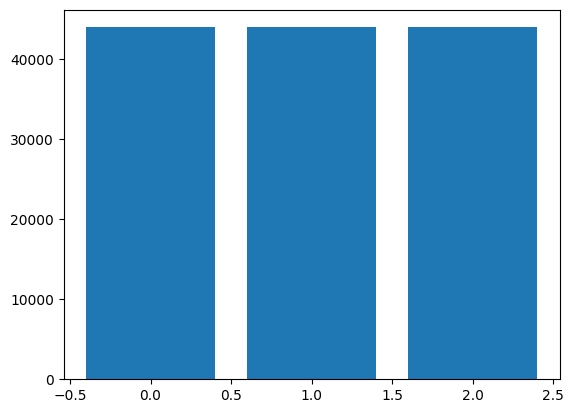

In [ ]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

# ML IMPLEMENTATION

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# Checking the coefficients
lr.coef_

array([[ 1.69605730e-01,  3.82851006e-01,  2.41078992e-01,
        -2.34295337e-02,  5.59967195e-04, -2.17384790e-01,
        -1.16525626e-01, -3.97445272e-02, -7.29968469e-02,
        -9.46466480e-02, -1.16717277e-01, -5.96356260e-02,
        -2.00085063e-01,  2.70617454e-01, -3.70058626e-01,
        -3.08776142e-02,  1.35991053e-02],
       [-3.43587900e-02,  1.46027074e-01,  8.29840106e-03,
         9.20060857e-03, -5.51916223e-04,  7.17461200e-02,
         4.59714125e-02,  3.87215114e-02,  1.14961923e-02,
         1.51153285e-02,  5.44594317e-02,  1.19216456e-02,
         6.98535538e-02, -3.72205977e-02,  3.17553347e-02,
        -2.18118378e-03, -3.00089038e-02],
       [-1.35246940e-01, -5.28878080e-01, -2.49377393e-01,
         1.42289251e-02, -8.05097278e-06,  1.45638670e-01,
         7.05542130e-02,  1.02301576e-03,  6.15006546e-02,
         7.95313195e-02,  6.22578454e-02,  4.77139804e-02,
         1.30231509e-01, -2.33396856e-01,  3.38303291e-01,
         3.30587980e-02,  1.6

In [ ]:
# Checking the intercept value
lr.intercept_

array([ 0.011599  ,  0.02612098, -0.03771998])

In [ ]:
# Get the predicted probabilities
train_probability = lr.predict_proba(X_train)
test_probability = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5283309436567363
The accuracy on test data is  0.6208031599736669


[[31270  4268  8401]
 [14624  9009 20306]
 [ 6851  7724 29364]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

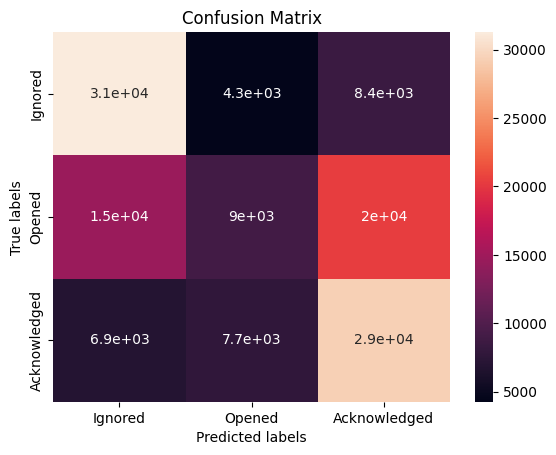

In [ ]:
# Get the confusion matrix for train

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# ML model 2 -- RANDOM FOREST

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability3 = rf_model.predict_proba(X_train)
test_probability3 = rf_model.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train3)
test_accuracy = accuracy_score(y_test,y_pred3)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9999089647010628
The accuracy on test dataset is 0.7768268597761685


# ML MODEL 3

In [ ]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

In [ ]:
# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [ ]:
y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [ ]:
# Get the predicted probabilities
train_probability5 = xg_models.predict_proba(X_train)
test_probability5 = xg_models.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train5)
test_accuracy = accuracy_score(y_test,y_pred5)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8382985502628644
The accuracy on test dataset is 0.7879452856411382


# FUTURE WORK(OPTIONAL)

1. Save the best performing ml model in a pickle file or joblib file forma

In [ ]:
# save the file

# 2. Again Load the saved model file and try to predict unseen data for a sanity check

In [ ]:
## Load the File and predict unseen data.

#CONCLUSION

* This dataset has total number of observations is 685353 and 12 features.

* Dataset has all null values and there is no duplicates that means data is fee from duplicates such as biased results or making it difficult to accurately the data.

* This data is clearly show that it is a mixture of integers, float and object data type.

* In Hypothesis testing the Email_TYPE of the campagin wii not have any significant impact on the Email_Satuts.

* SMOTE-It works by randomly picking points from the majority
  class k neareset neighbour in this points

* I Used ANOVA(analysis of variable) test becoz it is statistical
  test that is used to determine whether there is a significant difference in the mean of two or more groups.

* Feature Scaling is a technique to standardize the independent
  features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

* Analyzing total past communications, we can see that the more
  the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* Correlation matrix justifies our earlier hypotheses. Email
   Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. We can see multi collinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

* With such unbalanced data and outliers, the XGBoost algorithm
  performed as well as it could, followed by the Random Forest Hyperparameter Tuned model with an F1 Score of 0.68 on the test set.

* Email classification cannot take into account the time the  
  email was sent as a relevant element. Both the feature importance and this specific thing demonstrated it. Emails sent in category 2 during the middle of the day will undoubtedly receive more reading and acknowledgment than those sent in categories 1 and 2 during the day